[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/Copy_of_Gradient_Tree_Boosting.ipynb)

Equipe: Breno, Juliana, Patrícia, Turíbio

email: gradient-tree-boost@googlegroups.com

# Gradient Tree Boosting

O gradient tree boosting (aprimoramento da árvore de gradiente) é uma técnica de aprendizagem estatística não paramétrica flexível para classificação e regressão. A técnica consiste em classificação e regressão através da adoção conjuntos de árvores de decisão trabalhando sequencialmente para efetuar a predição.

Para demostrar como a técnica funciona, tomemos um problema de regressão bidimensional em que  $y = f (\mathbf {x}) = f (x_1, x_2) $ e investiguemos como uma árvore é capaz de reconstruir a função $f(\mathbf{x})$. 

![alt text](http://www.patricialucas.com.br/wp-content/uploads/2018/05/um.jpg)
![alt text](http://www.patricialucas.com.br/wp-content/uploads/2018/05/tres.jpg)
![alt text](http://www.patricialucas.com.br/wp-content/uploads/2018/05/seis.jpg)

Figura 1: função alvo semitransparente $f(\mathbf{x})$ e árvore de predição $d_\text{tree} (\mathbf {x})$ com profundidade 1, 3 e 6 respectivamente.

Uma árvore de decisão é um classificador bastante simples que divide o espaço de recursos em regiões aplicando uma divisão trivial. As regiões resultantes têm uma forma retangular e em cada região as previsões são constantes.

O gradient tree boosting é uma técnica de agrupamento, o que significa que a predição é feita por um conjunto de estimadores mais simples. O objetivo é criar (ou "treinar") um conjunto de árvores, dado que sabemos como treinar uma única árvore de decisão. Essa técnica é chamada de reforço porque esperamos que um conjunto trabalhe muito melhor do que um único estimador.


# Como o conjunto é construído?

O aumento de gradiente constrói um conjunto de árvores uma a uma e, em seguida, as previsões das árvores individuais são somadas:

$$D ( x ) = d_{tree 1} ( x ) + d_{tree 2} ( x ) + ...$$

A próxima árvore de decisão tenta cobrir a discrepância entre a função de destino $f (\mathbf{x})$ e a predição atual do conjunto, reconstruindo o residual.

Por exemplo, se um conjunto tem 3 árvores, a previsão desse conjunto é:

$$D (x) = d_{tree 1}(x) + d_{tree 2}(x) + d_{tree 3}(x)$$

A árvore seguinte no conjunto (tree 4) deve complementar bem as árvores existentes e minimizar o erro de formação do conjunto.

No caso ideal, teríamos:

$$D (\mathbf{x}) + d_\text{tree 4} (\mathbf{x}) = f(\mathbf {x}). $$

Para chegar um pouco mais perto do destino, nós treinamos uma árvore para reconstruir a diferença entre a função alvo e as previsões atuais do conjunto, que é chamado residual:

$$R (\mathbf{x}) = f (\mathbf {x}) - D (\mathbf {x}). $$

Agora vamos mostrar a mesma função $f(\mathbf{x})$ da Figura 1 sendo reconstruída pelo gradient tree boosting com a combinação de 100 árvores de decisão.

![alt text](http://www.patricialucas.com.br/wp-content/uploads/2018/05/gtb1.jpg)
![alt text](http://www.patricialucas.com.br/wp-content/uploads/2018/05/gtb3.jpg)
![alt text](http://www.patricialucas.com.br/wp-content/uploads/2018/05/gtb6.jpg)

Figura 2: função alvo semitransparente $f (\mathbf {x})$ e previsão de gradient tree boosting $D(\mathbf {x})$ com profundidade 1, 3 e 6 respectivamente.

Como vemos, o  gradient tree boosting é capaz de fornecer previsões detalhadas combinando árvores de profundidade muito limitada.


In [0]:
#Algumas libs conhecidas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets.california_housing import fetch_california_housing

#Libs para esse trabalho
from sklearn.ensemble import GradientBoostingRegressor

#mse
from sklearn.metrics import mean_squared_error

In [0]:
#Funções auxiliares
def plot_samples(y_test, y_hat):
  results = pd.DataFrame({'y esperado':y_test, 'y encontrado':y_hat})
  print (results.head(15))

  results.hist()

def plot_xy(x, y, xLabel, yLabel):
  plt.plot(x,y, linestyle='solid')

  miny = min(y)
  xwin = x[np.argmin(y)] 
  
  plt.text(0+xwin,miny, 'Min'+yLabel)

  plt.xlabel(xLabel)
  plt.ylabel(yLabel)


  plt.show()

## Dataset: California housing

Importa o dataset, separa em X e y e mostra quem são os labels do dataset.

In [4]:
cal_housing = fetch_california_housing()
X = cal_housing['data']#X
y = cal_housing['target']# y
Xy_labels = cal_housing['feature_names']
print(Xy_labels)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Exemplo 1 com GTB

Parâmetros que usaremos do 'GradientBoostingRegressor' do scikit learning:

- loss: {‘ls’, ‘lad’, ‘huber’, ‘quantile’} -> função usada na otimização
- random_state -> seed usada para geração de números aleatórios
- max_depht -> máxima profundidade dos estimadores de regressão individual
- learning_rate -> a taxa de aprendizado e contribuição de cada árvore por learning_rate.
- n_estimators -> o número de estágios boosting a serem executados. Quanto maior, mais chance de over-fitting.


In [0]:
learningRate = 0.04
nEstimators = 1000
maxDepth = 6
split_size = 0.4


modelo = GradientBoostingRegressor(loss='huber', random_state=0, max_depth=maxDepth,
                                   learning_rate=learningRate, n_estimators=nEstimators)

#embaralha as amostras
n = len(X)
idx = np.arange(n)

amostra_x = X[idx]
amostra_y = y[idx]

#separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(amostra_x, amostra_y, test_size=split_size, random_state=0)

#Encontra y_hat
y_hat = modelo.fit(X_train, y_train).predict(X_test)

#Calcula MSE, RMSE
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))



MSE:  0.21806858292539966 RMSE:  0.46697813966544477
    y encontrado  y esperado
0       1.433043       1.369
1       2.588940       2.413
2       1.472181       2.007
3       0.722630       0.725
4       4.701787       4.600
5       1.840243       1.200
6       2.587636       2.470
7       3.875639       3.369
8       2.909879       3.397
9       2.158683       2.656
10      2.740800       2.379
11      1.036155       0.922
12      0.846749       0.795
13      1.777388       1.375
14      2.233952       2.201


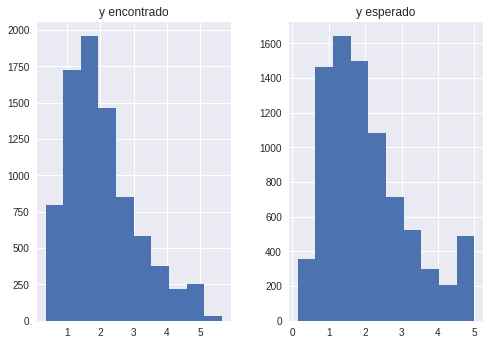

In [6]:
#Print comparativamente os resultados
print('MSE: ', mse, 'RMSE: ', rmse)


plot_samples(y_test, y_hat)

## Exemplo 2 GTB

Agora que fizemos um exemplo com valores definidos, vamos alterar os valores do learning_rate a fim de encontrar o melhor valor para o dataset atual.

**Vale lembrar: ** O learning rate define a taxa de aprendizado de cada tree. Dessa forma, para um loop desses, é esperado que haja alguma demora.

In [0]:
#learningRate = 0.04
learningRate = np.arange(0.2,1,0.2)
nEstimators = 1000
rmseLR = []

n = len(X)
#embaralha as amostras
idx = np.arange(n)

amostra_x = X[idx]
amostra_y = y[idx]

#separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(amostra_x, amostra_y, test_size=split_size, random_state=0)

for LR in set(learningRate):
    
  modelo = GradientBoostingRegressor(loss='huber', random_state=0, max_depth=maxDepth,
                                   learning_rate=LR, n_estimators=nEstimators)
  
  #Encontra y_hat
  y_hat = modelo.fit(X_train, y_train).predict(X_test)

  #Calcula MSE, RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_hat))
  
  rmseLR.append(rmse)

MSE:  0.47785250075951186 Best Learning Rate:  0.2


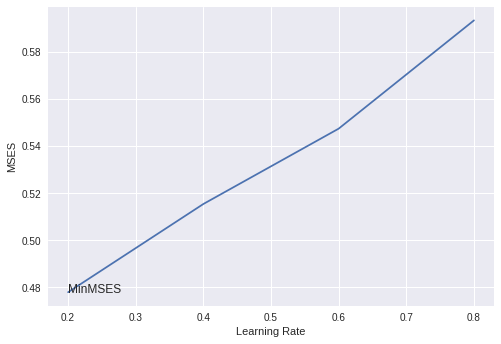

In [28]:
min_MSE = min(rmseLR)
LR_win = learningRate[np.argmin(rmseLR)]

#Print MSE mínimo e Learning Rate equivalente
print('MSE: ', min_MSE, 'Best Learning Rate: ', LR_win)

plot_xy(learningRate, rmseLR, 'Learning Rate', 'MSES')

## Exemplo 3 GTB

Vamos descobrir o melhor n_estimators.

**Vale lembrar: ** O n_estimators define o número de estágios boots a serem usados no GTB. Dessa forma, para um loop desses, é esperado que haja alguma demora.

In [0]:
learningRate = LR_win
nEstimators = np.arange(500,3000,500)
#nEstimators = 1000
rmseNE = []

n = len(X)
#embaralha as amostras
idx = np.arange(n)

amostra_x = X[idx]
amostra_y = y[idx]

#separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(amostra_x, amostra_y, test_size=split_size, random_state=0)

for NE in set(nEstimators):
    
  modelo = GradientBoostingRegressor(loss='huber', random_state=0, max_depth=maxDepth,
                                   learning_rate=learningRate, n_estimators=NE)
  
  #Encontra y_hat
  y_hat = modelo.fit(X_train, y_train).predict(X_test)

  #Calcula MSE, RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_hat))
  
  rmseNE.append(rmse)

MSE:  0.4764379672541269 Best n Estimator:  2000


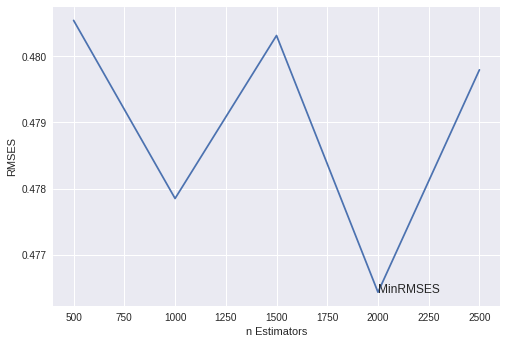

In [31]:
min_MSE = min(rmseNE)
NE_win = nEstimators[np.argmin(rmseNE)]

#Print MSE mínimo e Learning Rate equivalente
print('MSE: ', min_MSE, 'Best n Estimator: ', NE_win)

plot_xy(nEstimators, rmseNE, 'n Estimators', 'RMSES')

## Exemplo 4 GTB

Não se preocupe, esse é o último! Dentre os parâmetros principais de GTB, falta só alterarmos os valores de max_depth.


**Vale lembrar: ** O max_depth define a profundidade máxima que a árvore de decisão pode obter. Dessa forma, para um loop desses, é esperado que haja alguma demora.

In [0]:
learningRate = LR_win
nEstimators = NE_win
maxDepth = np.arange(2,10,2)
rmseMD = []

n = len(X)
#embaralha as amostras
idx = np.arange(n)

amostra_x = X[idx]
amostra_y = y[idx]

#separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(amostra_x, amostra_y, test_size=split_size, random_state=0)

for MD in set(maxDepth):
    
  modelo = GradientBoostingRegressor(loss='huber', random_state=0, max_depth=MD,
                                   learning_rate=learningRate, n_estimators=nEstimators)
  
  #Encontra y_hat
  y_hat = modelo.fit(X_train, y_train).predict(X_test)

  #Calcula MSE, RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_hat))
  
  rmseMD.append(rmse)

MSE:  0.47407818279779285 Best max_depth:  6


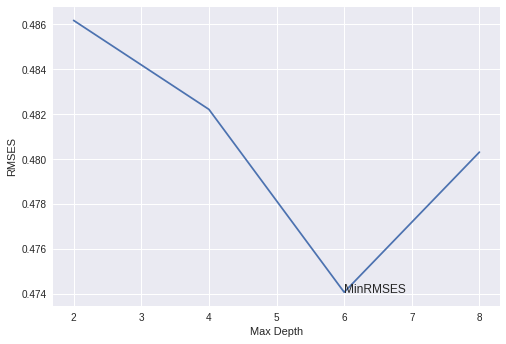

In [34]:
min_MSE = min(rmseMD)
MD_win = maxDepth[np.argmin(rmseMD)]

#Print MSE mínimo e Learning Rate equivalente
print('MSE: ', min_MSE, 'Best max_depth: ', MD_win)

plot_xy(maxDepth, rmseMD, 'Max Depth', 'RMSES')

# Conclusões

*Gradient Tree Boosting* envolve a criação e adição de árvores de decisões sequenciais, cada uma tentando corrigir os erros de aprendizarem da anterior. Dessa forma, os principais parâmetros que influenciam diretamente esse algoritmo são:

- Estimadores de boost (n_estimators)
- A taxa de aprendizado (learning_rate)
- Profundidade máxima da árvore (max_depth)

Como o estimador de boost e a taxa de aprendizado são diretamente relacionadas, é possível uma otimização para encontrar os melhores valores de ambos. Para tanto, foram criados diversas otimizações do GTB, como o **xtreme gradient boost** (XGBoost).







# Referências

### Lib de Python
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

#### Artigos

(2001) [Greedy Function Approximation: A Gradient Boosting Machine](http://www.jstor.org/stable/pdf/2699986.pdf)

(2004) [Training Conditional Random Fields via Gradient Tree Boosting](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.6703&rep=rep1&type=pdf)

(1999) [Stochastic gradient boosting] https://astro.temple.edu/~msobel/courses_files/StochasticBoosting(gradient).pdf


#### Links com conteúdo teórico

https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/


#### Videos explicativos
https://www.youtube.com/watch?v=7VeUPuFGJHk

https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

https://www.youtube.com/watch?v=2Mg8QD0F1dQ

https://www.youtube.com/watch?v=GM3CDQfQ4sw

